In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
# Number of records
num_rows = 10000

# Define possible values
age_groups = ["18-25", "26-35", "36-50", "51+"]
family_backgrounds = ["Single", "Married", "Married with Kids"]
comments_positive = ["looking for a quote urgently", "need this asap", "very interested", "call me back", "ready to proceed"]
comments_negative = ["not interested", "wrong number", "just browsing", "do not contact", "unsubscribe"]
comments_neutral = ["", "need more info", "what are the rates?"]

# Generate data
data = {
    "Email": [f"user{i}@test.com" for i in range(num_rows)],
    "PhoneNumber": [f"+91-9{random.randint(100000000, 999999999)}" for _ in range(num_rows)],
    "CreditScore": np.random.randint(300, 851, size=num_rows),
    "AgeGroup": np.random.choice(age_groups, size=num_rows, p=[0.2, 0.3, 0.3, 0.2]),
    "FamilyBackground": np.random.choice(family_backgrounds, size=num_rows, p=[0.3, 0.4, 0.3]),
    "Income": np.random.randint(100000, 1000001, size=num_rows),
    "Comments": [""] * num_rows,
    "Intent": [0] * num_rows
}

df = pd.DataFrame(data)

# Input validation
if not (300 <= df['CreditScore'].min() <= df['CreditScore'].max() <= 850):
    raise ValueError("Credit scores must be between 300 and 850")
    
if (df['Income'] < 0).any():
    raise ValueError("Income cannot be negative")

# Create logical relationships for the "Intent" target variable
# Higher intent for higher scores, income, and certain demographics
intent_probability = (df['CreditScore'] / 850 + df['Income'] / 1000000) / 2
# Adjust probability based on age and family
intent_probability[df['AgeGroup'] == '36-50'] += 0.1
intent_probability[df['FamilyBackground'] == 'Married with Kids'] += 0.1
intent_probability[df['CreditScore'] < 500] -= 0.15

# Normalize intent probability to [0,1] range
intent_probability = (intent_probability - intent_probability.min()) / (intent_probability.max() - intent_probability.min())

# Assign intent based on probability
df['Intent'] = (np.random.rand(num_rows) < intent_probability).astype(int)

# Sprinkle in comments based on intent
positive_indices = df[df['Intent'] == 1].index
negative_indices = df[df['Intent'] == 0].index

for i in np.random.choice(positive_indices, size=int(len(positive_indices) * 0.2), replace=False):
    df.at[i, 'Comments'] = random.choice(comments_positive)
    
for i in np.random.choice(negative_indices, size=int(len(negative_indices) * 0.2), replace=False):
    df.at[i, 'Comments'] = random.choice(comments_negative)

# Save to CSV
df.to_csv("lead_data.csv", index=False)

print("Dataset 'lead_data.csv' created successfully with 10000 rows.")

Dataset 'lead_data.csv' created successfully with 10000 rows.


In [2]:
df = pd.read_csv("lead_data.csv")
print(df.head())

            Email     PhoneNumber  CreditScore AgeGroup   FamilyBackground  \
0  user0@test.com  +91-9728437996          779    36-50            Married   
1  user1@test.com  +91-9674400250          438    18-25  Married with Kids   
2  user2@test.com  +91-9557698406          399    18-25  Married with Kids   
3  user3@test.com  +91-9553656666          719    36-50  Married with Kids   
4  user4@test.com  +91-9811587831          721    26-35  Married with Kids   

   Income        Comments  Intent  
0  980072             NaN       1  
1  905386             NaN       1  
2  710617             NaN       0  
3  176484  need this asap       1  
4  324641    call me back       1  


In [ ]:
df['Comments'].value_counts()


Comments
do not contact                  210
unsubscribe                     209
wrong number                    201
need this asap                  201
just browsing                   201
not interested                  200
call me back                    199
ready to proceed                197
very interested                 194
looking for a quote urgently    187
Name: count, dtype: int64

In [4]:
df['FamilyBackground'].value_counts()

FamilyBackground
Married              3925
Married with Kids    3043
Single               3032
Name: count, dtype: int64

In [5]:
df['AgeGroup'].value_counts()

AgeGroup
36-50    3002
26-35    2974
51+      2064
18-25    1960
Name: count, dtype: int64

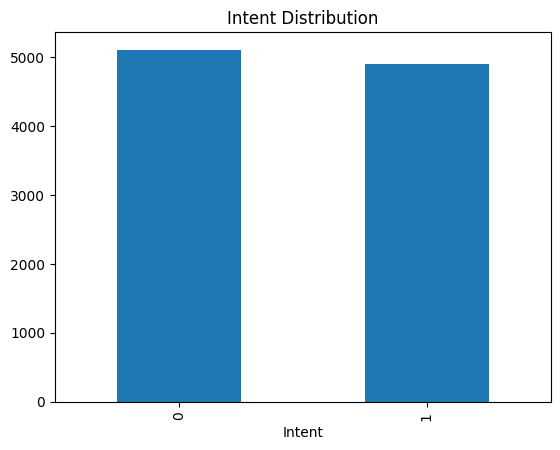

In [8]:
df['Intent'].value_counts().plot(kind='bar', title='Intent Distribution')
import matplotlib.pyplot as plt

In [1]:
# Data Generation and Visualization Complete